# Springboard Capstone 2 
## Initial Data Exploration

This notebook contains the initial wrangling and exploratory data analysis of the Book-Crossing datasets. There are three datasets: `BX-Books`, `BX-Users`, and `BX-Book-Ratings`. The final goal of this project is to create a recommendation engine based on user ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
%matplotlib inline

### BX-Books Dataset

First let's take a look at the `BX-Books` dataset.

In [2]:
books = pd.read_csv('data/BX-Books.csv', sep=';', encoding='latin-1')
books.head()

/Users/josephpetersen/miniconda3/envs/springboard/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Before uploading, the `BX-Books` dataset needed some manual adjustments. When initially reading the csv, a number of errors were thrown due to extra `;` throughout the dataset. Setting the `error_bad_lines` parameter to `False` skipped the bad lines, but it also popped back an error with location information. As they were few, I made the choice to investigate the root file and adjust manually.

The `&` symbol was coded as `&amp;` in the file causing multiple read errors. Find and replace easily took care of that. Also, multiple books had `;` in their title. These were replaced with `,` or `:` depending on the context. All in all this saved 19 lines that would have been dropped.

An encoding error was also throw at first, but setting the `encoding` parameter to the simple `latin-1` solved this issue.

The warning indicates that the year column has mixed types. We'll need to look at that but first let's drop the image URL's as they aren't needed, rename the columns to more usable aliases, and set the display width for easy reading.

In [3]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.columns = ['ISBN', 'title', 'author', 'year', 'publisher']
pd.set_option('display.max_colwidth', -1)
books.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
ISBN         271379 non-null object
title        271379 non-null object
author       271378 non-null object
year         271379 non-null object
publisher    271377 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


There look to be a few null entries, one in the `author` column and two in the `publisher` column.

In [5]:
books.loc[books.author.isnull()]

,ISBN,title,author,year,publisher
187700,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


The author information wasn't listed for this book, but some internet sleuthing shows the book listed with the publisher as the author in multiple locations.

In [6]:
books.loc[books.ISBN=='9627982032', 'author'] = 'Edinburgh Financial Publishing'
books.loc[books.ISBN=='9627982032']

,ISBN,title,author,year,publisher
187700,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,Edinburgh Financial Publishing,1995,Edinburgh Financial Publishing


In [7]:
books.loc[books.publisher.isnull()]

,ISBN,title,author,year,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


The publisher information for both NaN's was easily found after a little searching.

In [8]:
books.loc[books.ISBN=='193169656X', 'publisher'] = 'Mundania Press LLC'
books.loc[books.ISBN=='193169656X']

,ISBN,title,author,year,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,Mundania Press LLC


In [9]:
books.loc[books.ISBN=='1931696993', 'publisher'] = 'Bantam Books'
books.loc[books.ISBN=='1931696993']

,ISBN,title,author,year,publisher
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,Bantam Books


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
ISBN         271379 non-null object
title        271379 non-null object
author       271379 non-null object
year         271379 non-null object
publisher    271379 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


Next, we should look at why the initial read in of the csv threw a warning about different dtypes for the `year` column.

In [11]:
books.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '1999', '2002', '2001', '2000',
       '1996', '1992', '1995', '2004', '2003', '1990', '1994', '1986',
       '1989', '1981', '1993', '1983', '1982', '1976', '1991', '1977',
       '1998', '0', '1997', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

It looks like some of the years are `int`, some are `string`, and the publisher's name got wrapped in for a few due to a read error. Let's take care of the incorrect publisher's names first.

In [12]:
books.loc[books.year=='DK Publishing Inc']

,ISBN,title,author,year,publisher
209550,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221691,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [13]:
books.loc[books.ISBN=='078946697X', 'publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN=='078946697X', 'year'] = 2000
books.loc[books.ISBN=='078946697X', 'author'] = 'Michael Teitelbaum'
books.loc[books.ISBN=='078946697X', 'title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

books.loc[books.ISBN=='078946697X']

,ISBN,title,author,year,publisher
209550,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc


In [14]:
books.loc[books.ISBN=='0789466953', 'publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN=='0789466953', 'year'] = 2000
books.loc[books.ISBN=='0789466953', 'author'] = 'James Buckley'
books.loc[books.ISBN=='0789466953', 'title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

books.loc[books.ISBN=='0789466953']

,ISBN,title,author,year,publisher
221691,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [15]:
books.loc[books.year=='Gallimard']

,ISBN,title,author,year,publisher
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [16]:
books.loc[books.ISBN=='2070426769', 'publisher'] = 'Gallimard'
books.loc[books.ISBN=='2070426769', 'year'] = 2003
books.loc[books.ISBN=='2070426769', 'author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN=='2070426769', 'title'] = "Peuple du ciel, suivi de 'Les Bergers"

books.loc[books.ISBN=='2070426769']

,ISBN,title,author,year,publisher
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [17]:
books.year = pd.to_numeric(books.year)
books.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

With the publisher names fixed and all the items set as `int` we've fixed that issue, but looking at the list of unique entries we can see that there are some more errors. Year 0 doesn't make much sense and neither do any dates past when the dataset was created in 2004. While not ideal, the number of incorrect years is pretty large so converting them to `NaN` values is more feasible than correcting the dates.

In [18]:
books.loc[(books.year > 2004) | (books.year==0), 'year'] = np.NaN
#books.year.fillna(round(books.year.mean()), inplace=True)
books.year.unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931.,
       1914., 1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944.,
       1917., 1901., 1908., 1906., 1935., 1806., 1909., 1378., 1919.,
       1922., 1897., 1376.])

The `.` are at the end due to being converted to `float64` dtype when the `NaN` were added, but that's not an issue as working with floats is fine.

Since we're already working with the year column, let's see the distribution to get a sense of when the books we're looking at are from.

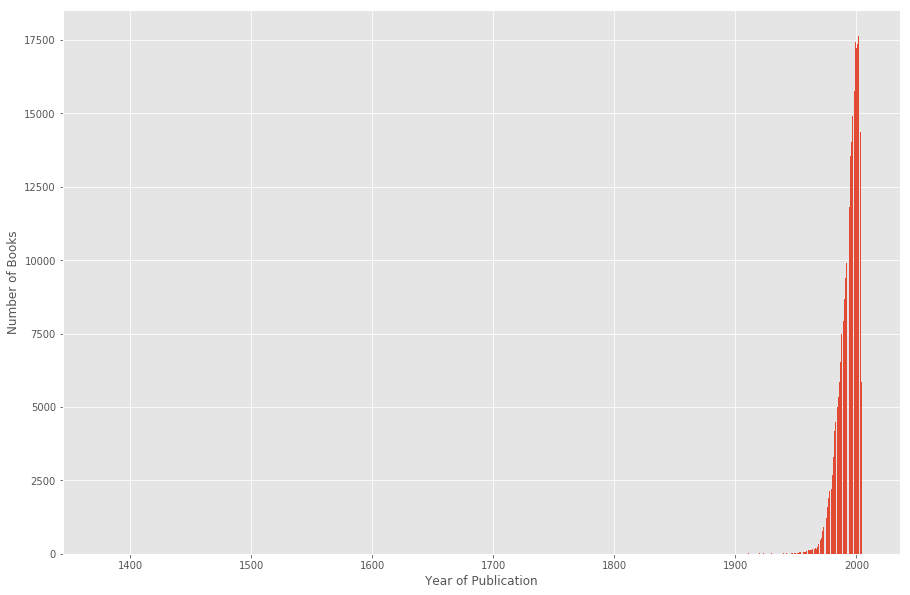

In [138]:
year = books.year.value_counts()
plt.figure(figsize=(15,10))
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.savefig('bookcount')

The distribution is pretty heavily skewed indicating that the majority of the books in the dataset are recent publications.

Now let's look at some of the other columns. First, I'd assume that each book has a unique ISBN, but let's confirm that. There are 271,379 entries and there are...

In [24]:
print(f'... {books.ISBN.nunique()} different ISBNs.')

... 271379 different ISBNs.


Everything checks out there.

What about the book titles? Are there any repeats?

In [32]:
books.title.value_counts()[:20]

Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Masquerade                        16
Frankenstein                      16
Black Beauty                      16
The Gift                          15
Emma                              15
Beloved                           15
Nemesis                           14
Robinson Crusoe                   13
The Wedding                       13
The Secret                        13
Name: title, dtype: int64

Okay, so it looks like there are books that have different editions under different ISBN. This will need to be addressed. Initial thoughts are to create a unique identifier for each title beyond ISBN that can collect books of the same name but different editions.

Which authors are the most prolific?

In [33]:
books.author.value_counts()[:20]

Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Francine Pascal          373
Carolyn Keene            373
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: author, dtype: int64

And how about publishers?

In [35]:
books.publisher.value_counts()[:20]

Harlequin                   7536
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3648
Scholastic                  3160
Simon & Schuster            2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Penguin USA                 2717
Harpercollins               2526
Fawcett Books               2258
Signet Book                 2070
Random House Inc            2045
St Martins Pr               1953
St. Martin's Press          1783
Tor Books                   1704
HarperCollins Publishers    1701
Zebra Books                 1694
Name: publisher, dtype: int64

### BX-Book-Ratings Dataset

Now let's take a look at the `BX-Book-Ratings` dataset.

In [36]:
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', encoding='latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


As in the `books` dataset, an encoding error was thrown so the `encoding` parameter was set to the simple `latin-1`. No errors were thrown regarding extra `;` though.

Renaming the columns.

In [40]:
ratings.columns = ['user_id', 'ISBN', 'rating']
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
user_id    1149780 non-null int64
ISBN       1149780 non-null object
rating     1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


No null values need to be addressed, and the datatypes look good (ISBN sometimes has letters in them so should remain an `object`).

Let's check the distribution of number of ratings per user.

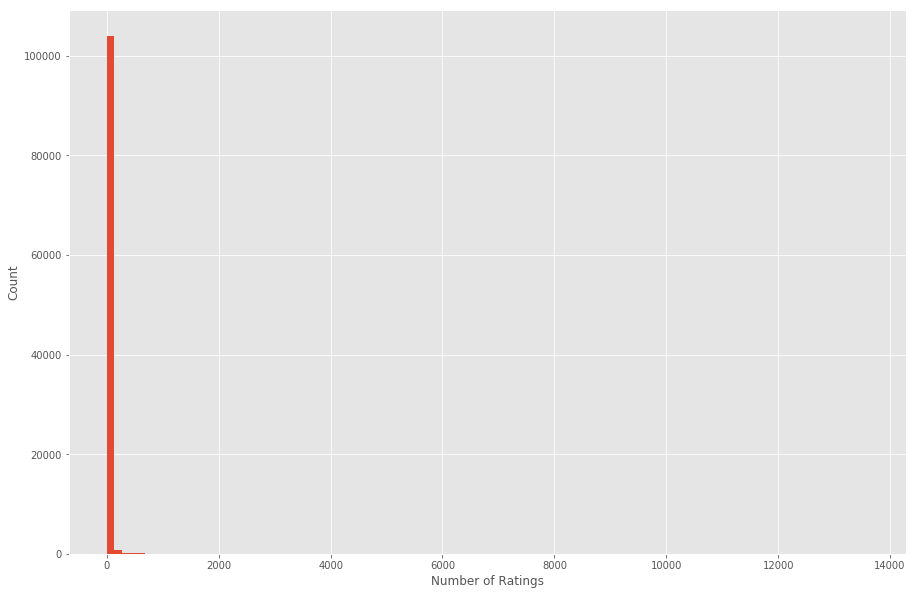

In [139]:
user_ratings = ratings.groupby('user_id').ISBN.count()
user_ratings.hist(bins=100, figsize=[15,10])
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.savefig('userratings')

The distribution is heavily skewed to the right. The vast majority of users rate very few books while there exist a few users who rate an incredibly large amount of books. This indicates that the recommendation matrix will be sparse (lots of NaN values where users didn't rate that particular title).

We can look at that directly by comparing the number of ratings to the ratings matrix.

In [121]:
n_users = ratings.user_id.nunique()
n_ratings = ratings.rating.shape[0]
rat_mat = n_users * n_ratings

n_ratings

1149780

In [122]:
rat_mat

121052287740

The size of the ratings matrix is far larger than the number of ratings indicating sparsity.

Are all the books rated in the `books` dataset?

In [123]:
rat_books = ratings[~ratings.ISBN.isin(books.ISBN)]
rat_books.ISBN.nunique()

70386

There are over 70,000 books rated that aren't in the `books` dataset. Let's remove those. Can't really recommend a book if you don't know its title.

In [134]:
ratings2 = ratings[ratings.ISBN.isin(books.ISBN)]
ratings2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031175 entries, 0 to 1149778
Data columns (total 3 columns):
user_id    1031175 non-null int64
ISBN       1031175 non-null object
rating     1031175 non-null int64
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


The `rating` column has a scale of 1-10 if rated *expilicitly* and a rating of 0 if rated *implicitly* in some other way tha a score. Since we're going to be working off explicit ratings, we should separate the implicit.

In [135]:
ratings_exp = ratings2[ratings2.rating != 0]
ratings_imp = ratings2[ratings2.rating == 0]
ratings_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383852 entries, 1 to 1149778
Data columns (total 3 columns):
user_id    383852 non-null int64
ISBN       383852 non-null object
rating     383852 non-null int64
dtypes: int64(2), object(1)
memory usage: 11.7+ MB


Looks like the majority of the ratings were in fact implicit ratings. The total number of ratings for books with ISBN in the `books` dataset was 1,031,175 while our explicit dataset has 383,852.

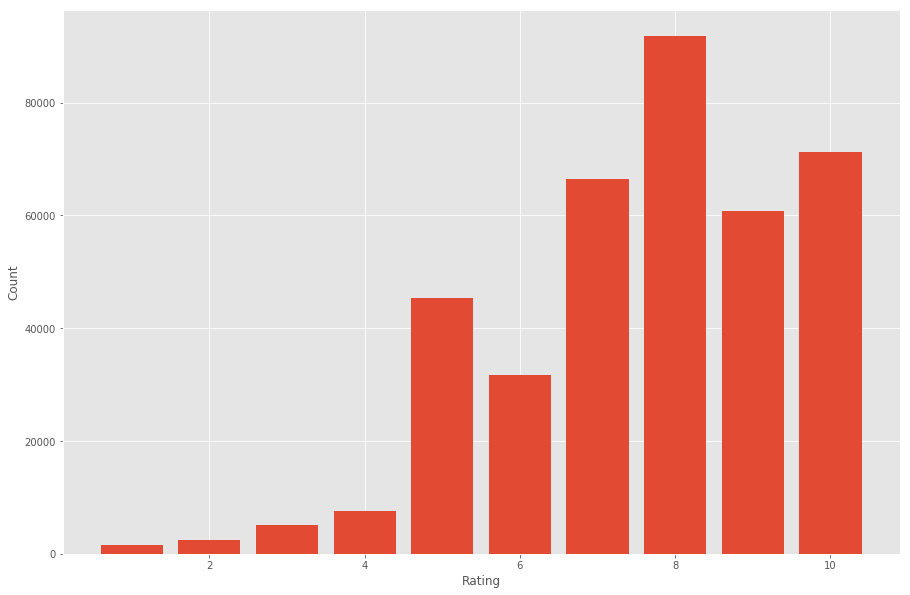

In [140]:
rate = ratings_exp.rating.value_counts()
plt.figure(figsize=(15,10))
plt.bar(rate.index, rate.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('ratingcount')

It seems people generally like their books with the majority of the ratings sitting at 5 or above.

### BX-Users Dataset

And finally, let's look at the `BX-Users` dataset.

In [85]:
users = pd.read_csv('data/BX-Users.csv', sep=';', encoding='latin-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Renaming the columns to something more easily usable.

In [86]:
users.columns = ['user_id', 'location', 'age']
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
user_id     278858 non-null int64
location    278858 non-null object
age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Alright so there are quite a few null values in age. If age becomes a factor in the recommendation engine, we'll have to adress that. We'll look at the ages more in depth, but first let's make sure all the `user_id` are unique.

In [87]:
users.user_id.nunique()

278858

Looks good, it matches the number of entries. Now let's get back to `age`.

In [88]:
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

So along with the null values there are plenty of ages that don't make much realistic sense. It's a reasonable assumption that those pre-kindergarten and over the age of 100 are likely errors. Let's fill those with null values to be more realistic.

In [89]:
users.loc[(users.age < 5) | (users.age > 100), 'age'] = np.NaN
print(sorted(users.age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


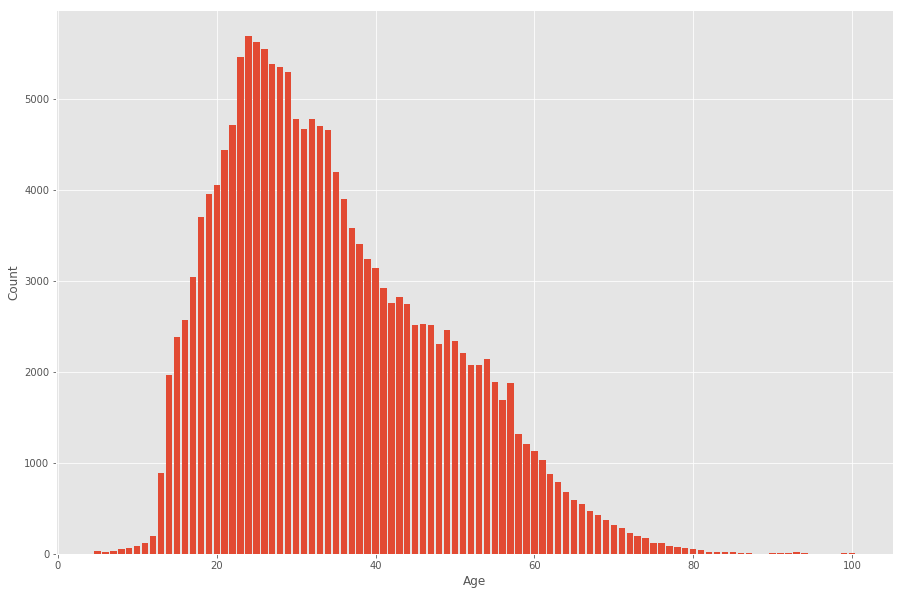

In [141]:
age = users.age.value_counts()
plt.figure(figsize=(15,10))
plt.bar(age.index, age.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('agecount')

The distribution is slightly skewed to the right with the majority of reviewers between 20-40.

In order to better analyze the location data, it would be useful to split the contained information into three columns: *city*, *state*, and *country*.

In [91]:
loc_ex = users.location.str.split(',', 2, expand=True)
loc_ex.columns = ['city', 'state', 'country']
loc_ex.head()

,city,state,country
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia
3,porto,v.n.gaia,portugal
4,farnborough,hants,united kingdom


In [92]:
users = users.join(loc_ex)
users.head()

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [93]:
users.drop(columns='location', inplace=True)
users.head()

,user_id,age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [94]:
users.city.value_counts()[:25]

london           4105
barcelona        2664
toronto          2342
madrid           1933
sydney           1884
portland         1869
melbourne        1863
vancouver        1699
chicago          1566
seattle          1541
new york         1445
milano           1390
san diego        1331
berlin           1306
ottawa           1303
san francisco    1300
houston          1241
paris            1189
roma             1045
austin           1044
los angeles      1042
calgary          1026
hamburg          1003
victoria         874 
manchester       838 
Name: city, dtype: int64

In [95]:
users.state.value_counts()[:25]

 california             19898
 n/a                    12527
 england                10691
 ontario                8736 
 texas                  8392 
 new york               7874 
 florida                7025 
 pennsylvania           6084 
 illinois               5874 
 washington             5824 
 british columbia       5399 
 ohio                   4683 
 michigan               4588 
 oregon                 4321 
 virginia               4310 
 massachusetts          3970 
 missouri               3924 
 nordrhein-westfalen    3893 
 north carolina         3730 
                        3619 
 new jersey             3601 
 victoria               3391 
 new south wales        3377 
 georgia                3362 
 minnesota              3077 
Name: state, dtype: int64

Californians sure like to read. Well, that plus it's basically the size of other whole countries.

There are a couple entries that stand out: 'n/a' and the blank string. The 'n/a' makes sense as some places don't have a state infrastructure, but the blank string is an error. These should be filled with NaN.

In [101]:
users.state.replace(' ', np.NaN, inplace=True)

In [102]:
users.state.value_counts()[:25]

 california             19898
 n/a                    12527
 england                10691
 ontario                8736 
 texas                  8392 
 new york               7874 
 florida                7025 
 pennsylvania           6084 
 illinois               5874 
 washington             5824 
 british columbia       5399 
 ohio                   4683 
 michigan               4588 
 oregon                 4321 
 virginia               4310 
 massachusetts          3970 
 missouri               3924 
 nordrhein-westfalen    3893 
 north carolina         3730 
 new jersey             3601 
 victoria               3391 
 new south wales        3377 
 georgia                3362 
 minnesota              3077 
 lombardia              2724 
Name: state, dtype: int64

In [98]:
users.country.value_counts()[:25]

 usa               139183
 canada            21556 
 united kingdom    18286 
 germany           17021 
 spain             13088 
 australia         11719 
 italy             11238 
                   4561  
 france            3440  
 portugal          3305  
 new zealand       3067  
 netherlands       3016  
 switzerland       1738  
 brazil            1668  
 china             1460  
 sweden            1401  
 india             1264  
 austria           1134  
 malaysia          1095  
 argentina         1075  
 singapore         922   
 finland           921   
 belgium           816   
 mexico            801   
 denmark           800   
Name: country, dtype: int64

In [99]:
users.country.replace('', np.NaN, inplace=True)

In [100]:
users.country.value_counts()[:25]

 usa               139183
 canada            21556 
 united kingdom    18286 
 germany           17021 
 spain             13088 
 australia         11719 
 italy             11238 
 france            3440  
 portugal          3305  
 new zealand       3067  
 netherlands       3016  
 switzerland       1738  
 brazil            1668  
 china             1460  
 sweden            1401  
 india             1264  
 austria           1134  
 malaysia          1095  
 argentina         1075  
 singapore         922   
 finland           921   
 belgium           816   
 mexico            801   
 denmark           800   
 ireland           747   
Name: country, dtype: int64

If location plays a role in the recommendation engine, these null values will need to be addressed, but for now we can leave them as is.

Now that things are a bit more cleaned up, let's look and see if the datasets match up. Are all the users from the `ratings` dataset in the `users` dataset?

In [129]:
rat_users = ratings_exp[~ratings_exp.user_id.isin(users.user_id)]
rat_users.user_id.nunique()

0

Okay, that's set there. Now we should look into joining the datasets together.

### Joining Ratings and Books datasets

We want to do a left join with the `ratings_exp` dataset as the caller as its specifically those ratings that we will care about in the recommendation engine.

In [131]:
books_ratings = ratings_exp.join(books.set_index('ISBN'), on='ISBN', how='left')
books_ratings.head()

,user_id,ISBN,rating,title,author,year,publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.0,Cambridge University Press
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch


In [133]:
books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383852 entries, 1 to 1149778
Data columns (total 7 columns):
user_id      383852 non-null int64
ISBN         383852 non-null object
rating       383852 non-null int64
title        383852 non-null object
author       383852 non-null object
year         377983 non-null float64
publisher    383852 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 23.4+ MB


Looks good! The null values in the `year` column are the `NaN` from the erroneous outliers before.

### Joining with the Users dataset

We will once again do a left join, this time with the previously joined `books_ratings` dataset as the caller as that's what we care about here.

In [137]:
full_df = books_ratings.join(users.set_index('user_id'), on='user_id', how='left')
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383852 entries, 1 to 1149778
Data columns (total 11 columns):
user_id      383852 non-null int64
ISBN         383852 non-null object
rating       383852 non-null int64
title        383852 non-null object
author       383852 non-null object
year         377983 non-null float64
publisher    383852 non-null object
age          268027 non-null float64
city         383852 non-null object
state        374778 non-null object
country      373372 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 35.1+ MB


The only columns with `NaN` values are `year`, `age`, `state`, and `country`. These are the columns we addressed before. If they turn out necessary in building the recommendation engine, they will be reassessed.